# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
Data handling and visualization

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* Explore the datatypes that scikit-learn uses
* Explore several techniques to prep data for use in scikit-learn
* Examine techniques to manipulate OR review the data
* Consider several techniques to view the data using matplotlib

**NOTE**: this is not intended to be an exhaustive overview of data handling OR visualization. We intend to cover just enough to help you understand what format your data should be in, several techniques to get data into that format and then several techniques to plot data on a chart...

...with the intent that we want to spend more time on the machine learning aspects of this tutorial.

As we look at the various machine learning examples in later sections, we will use one or more of the techniques displayed below to to get the data we need for that specific algorithm/model, but we won't be discussing OR elaborating on the data prep. 

# Overview: Data Handling
---

Generally, scikit-learn uses several of the most popular datatypes found in the Python data science ecosystem:

* numpy arrays
* scipy sparse matrixes
* pandas DataFrames


To train a scikit-learn classifier, all you need is a `2D array` (also called a `matrix` and often labeled `X`) for the input variables and a `1D array` (often labeled `y`) for the target variables. 

## Features

The 2D array `X` holds the features of your dataset as columns and holds individual samples of the data as rows.

Each column is a separate feature. In the examples below a feature could be the price of a soda OR could be the lengths of specific beetle body parts.

Each row in the examples below is a specific example of a soda OR a beetle.

### Features example one: Soda prices

|Soda size (oz)|
|:---|
|12|
|16|
|20|
|24|

### Features example two: Beetle sizes

|Head (mm)|Thorax (mm)|Abdomen (mm)| 
|:---|:---|:---|
|4|6|6|
|6|10|9|
|4|6|7|
|7|11|9|

## Targets

The 1D array `y` holds specific target values OR categorization labels.

In the examples below a target value could be the price of specific soda OR could the category of beetle that has body parts with specific lengths.

### Target example one: Soda costs

In this 1D target array, there are as many prices as there are rows in the 2D features array.

```
[0.50, 0.65, 0.70, 0.80]
```

### Target example two: Beetle classification

In this 1D target array, there are as many beetle categorizations as there are rows in the 2D features array.

* 0 = checkered beetle
* 1 = diving beetle

```
[0, 1, 0, 1] 
```

# Creating arrays for use in scikit-learn
---

There are many ways to create `2D` and `1D` arrays. Here we will show you several quick examples from `numpy` and `pandas` that you will see in this tutorial and/or in examples in books/online.

We will not dive deeply into the details... we leave it up to the student to explore tools like `numpy`, `scipy`, `pandas` to better understand what is happening under the hood.

## numpy

In [ ]:
import numpy as np

x = np.array([12, 16, 20, 14, 18])             # coffee sizes
y = np.array([2.95, 3.65, 4.15, 3.25, 4.20])   # coffee prices

Remember, that the features matrix must be in a 2D format and the target array must be in a 1D format, so let's look at the current arrangement using the `.shape` attribute associated with numpy arrays:

In [ ]:
x

In [ ]:
x.shape

In [ ]:
y

In [ ]:
y.shape

As we can see above, both of these are simply 1D arrays of length **five**, thus the tuple only has a single dimension of 5. The comma is required because the data type produced by the `.shape` attribute is a `tuple`.

To convert the `x` array from a 1D array to a 2D array, there are several techniques you will see:

### Numpy technique one:

In [ ]:
X_numpy_one = x[:, np.newaxis]        # np.newaxis increases dimensionality
X_numpy_one                           #     by one

### Numpy technique two:

In [ ]:
X_numpy_two = x[:, None]              # np.newaxis is actually an alias for
X_numpy_two                           #     None, so None also works

In [ ]:
X_numpy_one.shape

In [ ]:
X_numpy_two.shape

In [ ]:
### Numpy technique three:

X_numpy_three = x.reshape(len(x), 1)
X_numpy_three

### 2D numpy data:

If the data is already a 2D array/matrix you don't need to do anything:

In [ ]:
X_beetle = np.array([[4, 6, 6], 
                     [6, 10, 9], 
                     [4, 6, 7],
                     [7, 11, 9]])
X_beetle

In [ ]:
X_beetle.shape

## pandas

In [ ]:
import pandas as pd

x_pandas = pd.Series([12, 16, 20, 14, 18])
y_pandas = pd.Series([2.95, 3.65, 4.15, 3.25, 4.20])

You might presume that a pandas Series is a 2D array, but that is not the case... as we will see when we look at the shape.

In [ ]:
x_pandas

In [ ]:
x_pandas.shape

In [ ]:
y_pandas.shape

Again, both of these are simply 1D arrays of length **five**.

### Pandas technique one:

To convert the x_pandas 1D array to a 2D array, we can convert the pandas Series to a DataFrame:

In [ ]:
X_pandas_one = x_pandas.to_frame('size')
X_pandas_one

In [ ]:
X_pandas_one.shape

### Pandas technique two:

To convert the x_pandas 1D array to a 2D array, we can also use the DataFrame factory function to convert the pandas Series to a DataFrame, by giving the DataFrame constructor the name of the column:

In [ ]:
X_pandas_two = pd.DataFrame(x_pandas, columns=['size'])

In [ ]:
X_pandas_two

In [ ]:
X_pandas_two.shape

# Looking at the raw data
---

## Numpy

To see just the first few rows of a numpy array, it is common to take a slice:

In [ ]:
X_numpy_one[:3]       # first three rows

## Pandas

To see just the first few rows of a `pandas` `Series` or `DataFrame`, it is common to use `.head()` OR to take a slice:

In [ ]:
X_pandas_one.head(3)   # first three rows

In [ ]:
X_pandas_one[:3]       # first three rows

## Using `sklearn.model_selection.train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('../universal_datasets/coffee.csv')

Next we call the `.to_frame()` method on the pandas `Series` `df['size']` to create a 2D features matrix: `X`. Since the `Series` already has a column name, we don't need to provide a one as an argument in the `to_frame()` method.

We can simply assign an alias `y` to the `Series` `df['price']` to because `Series` already qualify as arrays.

In [ ]:
X = df['size'].to_frame()
y = df['price']

In [ ]:
X.head()

In [ ]:
y.head()

When calling the `train_test_split()` method, there are arguments to help determine the ratio between the training data and the test data, using `test_size` (generally a value between `0.0` and `1.0`, but other options are allowed). There is also a mechanism to set the random seed, using `random_state` (so that the split can be reproduced by collaborators, peer reviewers, students, colleagues, etc.

In this case, we set the `test_size` to be `0.33` so that about a third of the records are held off as a test set.

We also arbitrarily chose a `random_state` seed value of `42`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Let's take a look at each of these dataset partitions.

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

An alternative to identifying a ratio for the `test_size` argument is to simply identify how many records to hold out.

Let's redo the split, but change the `random_state` to 13 and change the `test_size` to only hold out 3 records for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3, random_state=13)

In [ ]:
X_test.shape # three records

In [ ]:
X_test

Previously, when we held out records using a `random_state=42` argument, we got these records. Notice that note only did we successfully hold out a different number of records, but we also held out different records. Only one sample of the new test set (sample # 11) matches any of the records from the earlier test set (shown below for convenience). 

```
X_test with random_state=42 and test_size=0.33:

9     18
11    16
0     12
13    14
5     12
```

# Overview: Data Visualization
---

Often, it is not enough to simply look at the data, we often want to plot the data to see relationships.

By and large, we will use tools in `matplotlib` to generate charts. Again, we won't be covering this in depth, we intend to provide several simple examples of the most common types of charts we will use in later lessons so that during our examinations of the machine learning models, we can focus on the models and not the pictures.

Our most common chart will be the scatter plot, which can be generated in the following ways:

We start with a standard import from `matplotlib`

In [125]:
import matplotlib.pyplot as plt

We are gonna read in some sample data. For now, don't worry about the data, just recognize that it is two columns.

In [126]:
df = pd.read_csv('../universal_datasets/linreg_train.csv',
                     names=['x', 'y'])
df.head(3)

,x,y
0,22.809099,11.567586
1,11.600227,5.214938
2,9.619661,4.057582


Scatter plots generally require two sequences of values to create a series of dots. Let's create two sequences using a technique that we learned above.

In [131]:
X_train = df['x'].to_frame()
y_train = df['y']

There are three things of importance in the next cell:

* Calling `plt.scatter(<x values>, <y_values>)` with generate a simple scatter plot.
* We can always add some additional characteristics to the plot by supplying values via specific method calls, such as `.title()`
* Appending a **semicolon** at the end of the last command, you can suppress the display of extraneous text and display nothing by the plot

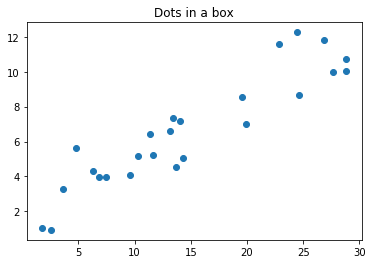

In [132]:
plt.scatter(X_train, y_train)
plt.title("Dots in a box");

Often, our machine learning algorithms will result in assigning a label OR category to each of the points on the plot and we frequently represent the labels using colors.

Let's presume that we have managed to label the points in this graph and have the labels stored in a 1D array (in this case a numpy array):

In [ ]:
labels = np.array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0])

In [ ]:
labels[:5]

We can generate a scatter plot much like before, but we can use the `c` argument to assign labels (categories) to each element of the plot AND we can use a color map (`cmap` such as `RdBu` OR `seismic`) to assign specific colors to each category.

In this case, we have 25 points, 25 labels (one per point) and we have the `RdBu` color mapping to map a color to each category (1 OR 0) on a spectrum of red and blue.

In [ ]:
plt.scatter(X_train['x'], y_train['y'], c=categories, cmap='RdBu')
plt.show()

As mentioned above, there are multiple `cmap`s. Each has specific characteristics. This is the `seismic` color map, which we will commonly use in this tutorial.

For details on the various colormaps or palettes available, see [**matplotlib colormaps**](https://matplotlib.org/users/colormaps.html)

In [ ]:
plt.scatter(X_train['x'], y_train['y'], c=categories, cmap='seismic')
plt.show()

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[General API Reference](https://scikit-learn.org/stable/modules/classes.html)||
|[XX API Reference]()||
|[User Guide]()||
|[Matplotlib Colormaps](https://matplotlib.org/users/colormaps.html)|Assorted palettes available for use with `matplotlib`|